## Lecture note 2: TensorFlow Ops

http://web.stanford.edu/class/cs20si/syllabus.html

### Fun with Tensorboard

텐서플로에서 우리는 constants, variables, operators as ops 를 호출할 수 있다. 텐서플로우는 단순한 library가 아니다.
Tensorflow, Tensorboard, Tensor Serving으로 이루어진 소프트웨어라고 볼 수 있다.

그 중에 tensorboard는 텐서플로에서 정의된 그래프를 시각화 해주는 소프트웨어라고 볼 수 있다. 구글 관계자는 다음과 같이 언급했다.
    
“The computations you'll use TensorFlow for - like training a massive deep neural network - can be complex and confusing. To make it easier to understand, debug, and optimize TensorFlow programs, we've included a suite of visualization tools called TensorBoard.”



유저가 Tensorboard를 활성화한 상태에서 텐서플로를 실행시키면, event_log 파일이 생성되게 된다. 텐서보드는 이 로그 파일을 이용하여 모델의 그래프와 실행과정(runtime)을 시각화(visualization) 할 수 있다.

In [1]:
import tensorflow as tf

C:\Users\home\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
a = tf.constant(2)
b = tf.constant(3)
x = tf.add(a,b)

with tf.Session() as sess:
    print(sess.run(a))

2


tensorflow 프로그램을 시각화하기 위해서, 우리는 프로그램의 log file을 생성해야 한다.
event file을 생성하기 위해서는 다음과 같은 코드를 통해 log에 대한 writer를 만들어야 한다.

In [6]:
'''writer = tf.summary.FileWriter([logdir], [graph])'''
#'graph' 는 프로그램이 동작하는 그래프를 지정한다. 보통은 tf.get_default_graph()로 기본 그래프를 지정하면 된다.
#'logdir' 은 log file이 저장될 위치를 지정한다.

'writer = tf.summary.FileWriter([logdir], [graph])'

In [9]:
a = tf.constant(2)
b = tf.constant(3)
x = tf.add(a,b)
writer = tf.summary.FileWriter('/Users/home/cs20_v2/week2/graphs', tf.get_default_graph())

with tf.Session() as sess:
    # writer = tf.summary.FileWriter('./graphs', sess.graph)
    # if you prefer creating your writer using session's graph
    print(sess.run(x))
writer.close()

5


log file이 생성되었으면, 터미널로 이동해서 텐서보드를 실행시킨다.

$tensorboard --logdir 'logdir' --port 6006

텐서보드 페이지로 이동하게 되면 두 개의 constant와 하나의 add op, 즉 세 개의 node를 볼 수 있다. 

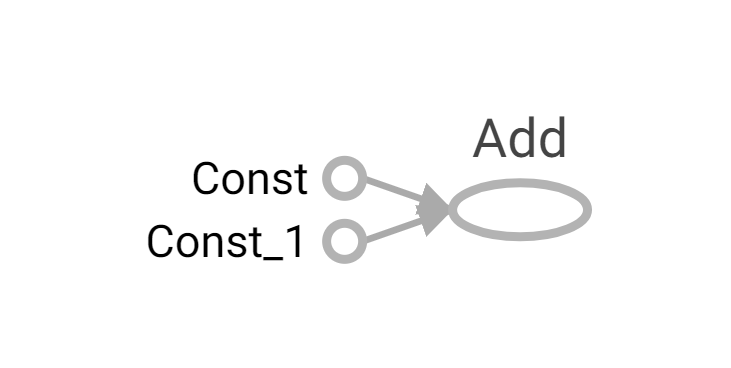

const 과 const_1는 각각 a와 b를 말하고 있다. 여기서 이 constant의 이름을 명시하고 싶으면 다음과 같이 constant를 정의해야 한다.

In [ ]:
a = tf.constant(2, name='a')
b = tf.constant(3, name='b')
x = tf.add(a,b, name='add')

## Constnat op

In [ ]:
#Tensors filled with a specific value
c = tf.constant([0,1], [2,3], name='maxtrix') #tf.constant(value, dtype=None, shape=None, name='Const', verify_shape=False)
d = tf.zeros([2,3], dtype=tf.int32) #tf.zeros(shape, dtype=tf.float32, name=None)
#tf.zeros_like(input_tensor, dtype=None, name=None, optimize=True), 특정 tensor의 shape 과 동일한 shape의 0 tensor 생성
input_tensor = tf.constant([[0, 1], [2, 3], [4, 5]])
e = tf.zeros_like(input_tensor)
f = tf.ones([2,3], dtype=tf.int32) #tf.ones(shape, dtype=tf.float32, name=None)
g = tf.ones_like(input_tensor)
h = tf.fill([2,3], 8)

#Constants as sequences
i = tf.lin_space(10.0, 13.0, 4) #tf.lin_space(start, stop, num, name=None) ==> [10.0 11.0 12.0 13.0]
#tf.range([start], limit=None, delta=1, dtype=None, name='range')
j = tf.range(3,18, 3) # ==> [3, 6, 9, 12, 15]
k = tf.range(5) # ==> [0, 1, 2, 3, 4]

특정한 분포에서 random constant를 생성할 수도 있다.

* tf.random_normal
* tf.truncated_normal
* tf.random_uniform
* tf.random_shuffle
* tf.random_crop
* tf.multinomial
* tf.random_gamma
* tf.set_random_seed

기본적인 산수 연산을 제공한다.
* tf.abs
* tf.negative
* tf.sign
* tf.reciprocal
* tf.square
* tf.round
* tf.sqrt
* tf.rsqrt
* tf.pow
* tf.exp

텐서플로우에서는 다양한 data type을 제공하고 있다. TF 데이터 타입은 Numpy와 같다고 볼 수 있다.
하지만 텐서플로를 사용할 때는 가능한 TF 데이터 타입을 사용하는 것이 좋다.

In [1]:
import tensorflow as tf
import numpy as np
tf.int32 == np.int32

C:\Users\home\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


True

그렇다면 constant(상수)란 무엇일까?

constant는 그래프의 정의 안에 저장된 값이라고 볼 수 있다.(constant are stored in the graph definition)

constant를 사용하는 데 문제점이 있다. constant의 값이 클 경우, graph를 loading하는데 많은 시간이 걸리게 된다. 
따라서 constant는 primitive types에만 사용을 하고, 많은 메모리를 필요로하는 값은 variable이나 readers를 사용하는 것이 좋다.

## Variable

In [11]:
#create variables with tf.Variable
s = tf.Variable(2, name='scalar')
m = tf.Variable([[0,1],[2,3]], name='martix')
W = tf.Variable(tf.zeros([784,10]))

# create variables with tf.get_variable
s = tf.get_variable('scalar_2', initializer=tf.constant(2))
m = tf.get_variable('matrix_2', initializer=tf.constant([[0, 1], [2, 3]]))
W = tf.get_variable('big_matrix', shape=(784,10), initializer=tf.zeros_initializer())

여기서 tf.constant와 tf.Variable의 큰 차이점이 있다.

tf.constant는 하나의 op이지만, tf.Variable는 많은 ops들로 구성된 class라는 점이다.

In [10]:
x = tf.Variable(2, name='x')

#x.initializer # init op
#x.value() # read op
#x.assign(...) # write op
#x.assign_add(...) # and more

변수를 사용하기 위해서는 먼저 initialize 과정을 해야 사용할 수 있다.
해당 과정을 하지 않으면,  'FailedPreconditionError' 이 뜨면서 실행이 되지 않는다.

In [ ]:
#The easiest way is initializing all variables at once:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) #initialize 과정도 하나의 op이므로, 세션에서 실행시켜주어야 한다.
    sess.run(tf.initialize_variables([s,m])) #Initialize only a subset of variables
    sess.run(W.initializer()) #Initialize a single variable

### eval a variable

변수를 출력하기 위한 명렁어인 eval()이 있다.

In [14]:
# W is a random 700 x 100 variable object
W = tf.Variable(tf.truncated_normal([700, 10]))
with tf.Session() as sess:
    sess.run(W.initializer)
    print(W)
    print(W.eval()) # print(sess.run(W))와 같음.

<tf.Variable 'Variable_1:0' shape=(700, 10) dtype=float32_ref>
[[-0.06490973 -0.03819519  0.3018671  ... -0.7806528  -0.03842064
  -0.7558326 ]
 [ 1.2640233  -1.0096376   0.36251268 ... -0.22079319  0.5611361
  -0.06223309]
 [ 1.0386921  -0.8279699  -1.374303   ... -0.17972356 -0.12818637
  -1.0195895 ]
 ...
 [-0.61905265  0.5914723  -0.4435951  ...  0.03848564  0.7948613
   0.783635  ]
 [-0.43160832 -0.9113987  -0.8774088  ...  0.2580037  -0.34540117
   0.59399605]
 [-0.4521617  -0.24454848  0.88255906 ... -0.22670662 -0.7543505
   1.2218344 ]]


In [26]:
#tf.Variable.assign 
W = tf.Variable(10)
assign_op = W.assign(100)
with tf.Session() as sess:
    sess.run(W.initializer)
    print(W.eval())

#출력은 100이 아닌 10이 되게 된다. assign 연산을 정의만 하고 실행하지 않았기 때문이다.
    sess.run(assign_op)
    print(W.eval())

10
100


In [28]:
# create a variable whose original value is 2
my_var = tf.Variable(2, name="my_var") 

# assign a * 2 to a and call that op a_times_two
my_var_times_two = my_var.assign(2 * my_var)

with tf.Session() as sess:
    sess.run(my_var.initializer)
    print(sess.run(my_var_times_two))
    print(sess.run(my_var_times_two))
    print(sess.run(my_var_times_two))

4
8
16


In [29]:
#Control Dependencies
#tf.Graph.control_dependencies(control_inputs), 실행의 우선 순위를 선정할 수 있다.

# your graph g have 5 ops: a, b, c, d, e
'''
g = tf.get_default_graph()
with g.control_dependencies([a, b, c]):
    # 'd' and 'e' will only run after 'a', 'b', and 'c' have executed.
    d = ...
    e = …
'''

"\ng = tf.get_default_graph()\nwith g.control_dependencies([a, b, c]):\n    # 'd' and 'e' will only run after 'a', 'b', and 'c' have executed.\n    d = ...\n    e = …\n"

## Placeholder

텐서플로는 앞서 본 것 처럼 두가지 과정으로 실행된다.

    1. 그래프를 조합한다.
    2. 세션을 사용해서 그래프의 연산을 수행한다.
    
첫번째 그래프를 과정에서 연산해야할 값이 무엇인지는 알지 못하고 그래프를 먼저 조합하게(asseble)된다.

$f(x) = 2*x + y$ 에서 우리는 x와 y값이 무엇인지 알고 있지 않다. 즉, 실제 값이 들어가게 되는 x와 y를 placeholder로 정의하게 된다.

placeholder를 사용하기 위해서는 dictionary를 사용하여 세션에서 값을 넣어주면(supply) 된다.

이때 placeholder를 선언할 때, shape을 지정하지 않아도 feed_dict의 shape을 자동으로 받아드리게 된다.
하지만 디버깅 등의 작업을 위해 shape을 선언해 주는 것이 좋다.

In [81]:
a = tf.placeholder(tf.float32, shape=[3])
b = tf.constant([5,5,5], dtype=tf.float32)
c = a+b

with tf.Session() as sess:
    print(sess.run(c, feed_dict={a: [1,2,3]})) #dic 형태이므로 a는 string이 아니고 a Tensor을 가리킨다.

[6. 7. 8.]
[6. 7. 8.]
[6. 7. 8.]


여러개의 data point를 feed 하고 싶을 경우에도 하나씩 feed 될 수 있도록 해야한다.

In [85]:
a = tf.placeholder(tf.float32, shape=[3])
list_a = [[1,2,3], [1,2,3], [1,2,3]]
b = tf.constant([5,5,5], dtype=tf.float32)
c = a+b

with tf.Session() as sess:
    for a_value in list_a:
        #print(a_value)
        print(sess.run(c, feed_dict={a: a_value}))

[6. 7. 8.]
[6. 7. 8.]
[6. 7. 8.]
